In [ ]:
import warnings
import numpy as np
import sklearn.metrics as metrics
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [ ]:
from matplotlib import animation, rc
rc('animation', html='html5')
from IPython.display import HTML, Image
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from dataset import suny_international
from animate import plot_daily

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [58]:
def plot_daily(*dfs, save=None, index=None):
    if index is not None:
        dfs = [pd.Series(df, index=index) for df in dfs]
    fig = plt.figure()
    max_y = max((df.max() for df in dfs))
    xlim = (dfs[0].index.time.min(), dfs[0].index.time.max())
    ax = plt.axes(ylim=(0, max_y), xlim=xlim)
    len_df = len(set(dfs[0].index.date))
    lines = [ax.plot([], [], 'o-', lw=2)[0] for _ in dfs]
    df_days = [df.groupby(pd.Grouper(freq='D')) for df in dfs]
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    def init():
        for line in lines:
            line.set_data([], [])
        time_text.set_text('')
        return lines + [time_text]

    def update(df):
        for df_day, line in zip(df, lines):
            line.set_data(df_day[1].index.time, list(df_day[1]))
        time_text.set_text(df[0][0].strftime("%b %Y"))
        return lines + [time_text]

    anim = animation.FuncAnimation(fig, update, frames=zip(*df_days), init_func=init, blit=True, interval=50, save_count=len_df)
    if save is not None:
        anim.save(save)
    return anim

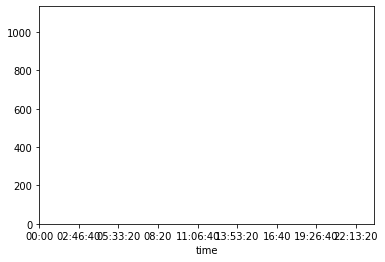

In [59]:
anim=plot_daily(suny_international.load_data()['GHI'], )

In [60]:
anim

In [33]:
ghi=suny_international.load_data()['GHI']

In [35]:
d=ghi.groupby(pd.Grouper(freq='D'))

In [37]:
s=[]
for i in d:
    s.append(i)

In [43]:
len(s)

1461

In [53]:
len(set(ghi.index.date))


1461